In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats

We'll start by importing some data to play with. Let's take a look at the **iris dataset** (more precisely, Fisher's iris dataset), a multivariate dataset generated in 1936 by Edgar Anderson that quantifies the variations in how many different irises look.

We'll load the iris dataset from a URL that points to a CSV (comma separated values) file, which is just a common file format that's used to encode data tables, as detailed [here](https://www.angela1c.com/projects/iris_project/downloading-iris/).

We'll be using `pandas`(a commonly-used Python data science library) to read the CSV into a a **dataframe** (a type of data structure that's really easy to slice and dice). 

We have the dataset URL ready to go, along with the column names we want to use -- now it's up to you to read the CSV, then print the first 5 rows!

**Exercise 0:** Read the iris dataset into a pandas dataframe using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function (hint: load in column names with the `names` argument), then print the first 5 rows with the [`head`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) function.

In [4]:
# Exercise 0

iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# we'll just need these column names to make the dataset easier to index (i.e. move through, slice and dice)
col_names = ["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width","Class"]

# DONE: Read the iris dataset into a dataframe
iris = pd.read_csv(iris_url, names=col_names)

**Mini-questions:**
1. What does each row represent?
    - One iris that they studied
2. What does each column represent?
    - A characteristic they measured for each iris
3. Which of the variables are categorical? Which are quantitative? Which are discrete? Which are continuous?
    - Categorical: class
    - Quantitative: sepal length, width; petal length, width
    - Discrete: none
    - Continuous: sepal length, width; petal length, width

**Exercise 1:**  Find all of the unique iris classes represented in the dataset using `Counter`. Then, generate a copy of the dataframe where each class is replaced by a numerical value using pandas `replace`.

In [9]:
# Exercise 1
# DONE: find all the unique iris "classes" represented in the dataset
print(Counter(iris["Class"]))

# DONE: replace each iris "class" with a numerical value
iris.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})


Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Class
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]

You can use the **loc** function to access certain rows, columns, or subsets thereof by **labels**. Use **iloc** to access rows, columns, or subsets by number. Read about the specifics [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)!

**Exercise 2:** Find the members of the dataset in the class `"Iris-setosa"` that have a `Sepal_Width` below 3.4 and a `Petal_Length` above 1.4 using `loc`.


In [15]:
# Exercise 2
# DONE: Find the members of "Iris-setosa" that have a Sepal_Width below 3 and a Petal_Length above 1.4
iris.loc[(iris["Class"] == "Iris-setosa")&(iris["Sepal_Width"] < 3.4)&(iris["Petal_Length"] > 1.4)]

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
3            4.6          3.1           1.5          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
23           5.1          3.3           1.7          0.5  Iris-setosa
25           5.0          3.0           1.6          0.2  Iris-setosa
29           4.7          3.2           1.6          0.2  Iris-setosa
30           4.8          3.1           1.6          0.2  Iris-setosa
34           4.9          3.1           1.5          0.1  Iris-setosa
37           4.9          3.1           1.5          0.1  Iris-setosa

Now that we've got the easy (er, easier) stuff out of the way, let's get started on some actual data analysis!
Let's start by examining some straightforward relationships in the data. We'll be using `scipy stats` to do some statistical analysis, and `seaborn`, a Python library commonly used to make data visualizations, to make some plots that let us visualize these relationships.

**Exercise 3:** Find out which two continuous variables in the dataset have the strongest relationship using [`stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html).

In [23]:
# Exercise 3
# Done: Find correlation between two continuous variables in dataset
# can compare to sepal length vs sepal width - much weaker corr
stats.pearsonr(iris["Sepal_Length"], iris["Petal_Length"])

PearsonRResult(statistic=0.8717541573048714, pvalue=1.0384540627940487e-47)

**Exercise 4:** Plot these two variables against each other using seaborn linear model plot: [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html).

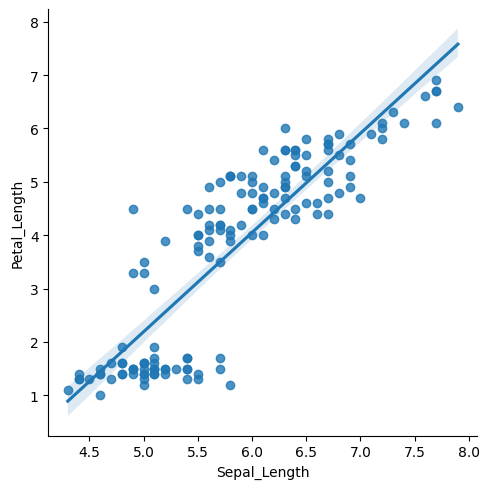

In [25]:
# Exercise 4
# DONE: Plot the two variables from exercise 3 against each other
sns.lmplot(data=iris, x="Sepal_Length", y="Petal_Length")

**Mini exercise:**
1. How well do you think the linear model seaborn generated describes this relationship?
2. Does this make sense in relation to the correlation numbers?